# Bell State Circuits

## Some Resources

* <a href=https://www.cs.cmu.edu/~odonnell/quantum15/QuantumComputationScribeNotesByRyanODonnellAndJohnWright.pdf> Notes by Ryan O’Donnell </a>
* <a href=https://medium.com/mdr-inc/checking-the-unitary-matrix-of-the-quantum-circuit-on-qiskit-5968c6019a45 >Checking the unitary matrix on Qiskit</a>
* <a href=https://levelup.gitconnected.com/introduction-to-quantum-computing-using-qiskit-and-ibm-q-a4c4fead6344>Introduction to Quantum Computing using Qiskit and IBM Q

</a>

## All the 4 Bell Circuits

**Reference**

* [Stackexchange QnA](https://quantumcomputing.stackexchange.com/questions/2258/how-to-implement-the-4-bell-states-on-the-ibm-q-composer) on Bell Circuits



In [1]:
#!/usr/bin/env python3 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute

from qiskit.visualization import plot_bloch_multivector, plot_histogram

import numpy as np
import pylab as plt

import sys
sys.path.append("/Users/gshyam/projects/work_projects/machine_learning/QuantumComputing/quantum_computing/utils")
from utils import get_statevector

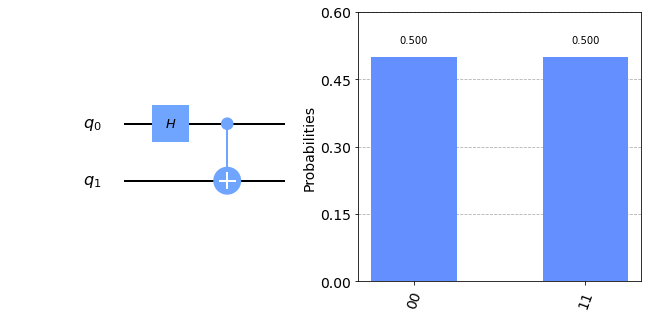

In [2]:
def get_state_bell_ckt(qc):
    backend = Aer.get_backend('statevector_simulator')
    res  = execute(qc, backend=backend).result()
    final_state = res.get_statevector()
    counts = res.get_counts()
    return (final_state, counts)

qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0,1)
fig, ax = plt.subplots(1, 2, constrained_layout=True)
qc1.draw(output='mpl', ax=ax[0], scale=1.5)
sv, counts = get_state_bell_ckt(qc1)
plot_histogram(counts, ax=ax[1])

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j] {'00': 0.5, '11': 0.5}


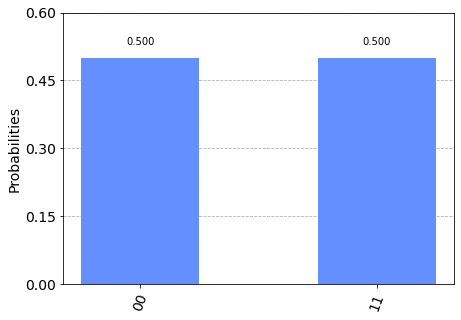

In [3]:
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0,1)
qc1.draw(output='mpl')

backend = Aer.get_backend('statevector_simulator')
res  = execute(qc1, backend=backend).result()
final_state = res.get_statevector()
counts = res.get_counts()
print (final_state, counts)

plot_histogram(counts)


[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j] {'01': 0.5, '10': 0.5}


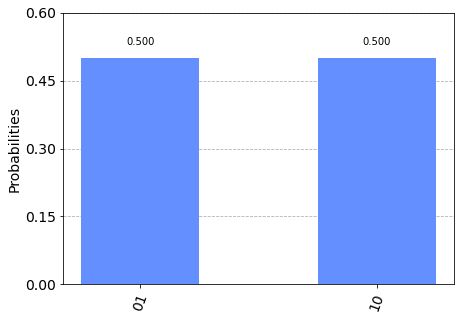

In [4]:
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0,1)
qc2.x(0)
qc2.draw(output='mpl')

backend = Aer.get_backend('statevector_simulator')
res  = execute(qc2, backend=backend).result()
final_state = res.get_statevector()
counts = res.get_counts()
print (final_state, counts)

plot_histogram(counts)


[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j] {'01': 0.5, '10': 0.5}


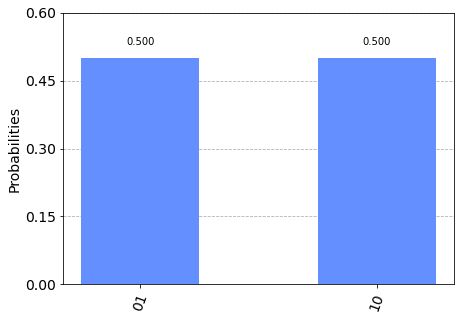

In [5]:
qc3 = QuantumCircuit(2)
qc3.h(0)
qc3.cx(0,1)
qc3.x(1)
qc3.draw(output='mpl')

backend = Aer.get_backend('statevector_simulator')
res  = execute(qc3, backend=backend).result()
final_state = res.get_statevector()
counts = res.get_counts()
print (final_state, counts)

plot_histogram(counts)


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j] {'00': 0.5, '11': 0.5}


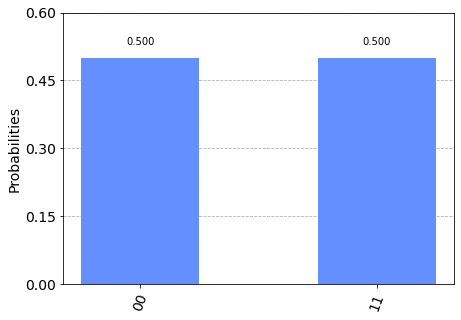

In [6]:
qc4 = QuantumCircuit(2)
qc4.h(0)
qc4.cx(0,1)
qc4.x(1)
qc4.x(0)
qc4.draw(output='mpl')

backend = Aer.get_backend('statevector_simulator')
res  = execute(qc4, backend=backend).result()
final_state = res.get_statevector()
counts = res.get_counts()
print (final_state, counts)

plot_histogram(counts)


In [7]:
#!/usr/bin/env python3 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute

from qiskit.visualization import plot_histogram

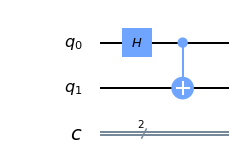

In [8]:
# Define quantum circuit

N_qubits=2; N_bits=2;
bell= QuantumCircuit(N_qubits, N_bits);
bell.h(0)      # Add a hadamard
bell.cx(0, 1)  # add a Cnot gate # similar to Last week's discussion
# Measure the result : Syntax QuantumCircuit.measure(qubit, cbit)
#bell.measure([0,1],[0,1])
#bell.draw()
bell.draw(output='mpl')

* initial state: $\vert 00 \rangle $ 
* After Hadamard Gate: $ \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 10 \rangle $ 
* After CNOT Gate: $ \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 11 \rangle $

In [9]:
for backend in Aer.backends():
    print(backend.name() )

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [10]:
backend = Aer.get_backend('unitary_simulator')
job_uni = execute(bell, backend)
res_uni = job_uni.result()
print(res_uni.get_unitary(bell, decimals=1))

[[ 0.7+0.j  0.7-0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0.7+0.j -0.7+0.j]
 [ 0. +0.j  0. +0.j  0.7+0.j  0.7-0.j]
 [ 0.7+0.j -0.7+0.j  0. +0.j  0. +0.j]]


In [11]:
bell.measure([0,1],[0,1])
backend = Aer.get_backend('unitary_simulator')
N=2
q=QuantumRegister(N)
c=ClassicalRegister(N)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.cx(q[0],q[1])
circ.h(q[1])

job = execute(circ, backend)
result = job.result()
print(result.get_unitary(circ, decimals=1))

[[ 0.5+0.j  0.5-0.j  0.5-0.j  0.5-0.j]
 [ 0.5-0.j -0.5+0.j  0.5+0.j -0.5+0.j]
 [ 0.5+0.j  0.5-0.j -0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5-0.j  0.5+0.j -0.5+0.j]]


In [12]:
sim_qsm = Aer.get_backend('qasm_simulator')
job_qsm = execute(bell, sim_qsm, shots=1024) # shots=1024 (default)
res_qsm = job_qsm.result()
print (res_qsm)

Result(backend_name='qasm_simulator', backend_version='0.5.1', date=datetime.datetime(2020, 8, 18, 22, 26, 7, 763963), header=Obj(backend_name='qasm_simulator', backend_version='0.5.1'), job_id='3fd057a5-3c17-4e37-a1ef-f03339cbb337', metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0034806700000000004}, qobj_id='3c5d6f53-4b6d-48d3-85f8-c40acbb4210b', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=519, 0x3=505)), header=Obj(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], memory_slots=2, n_qubits=2, name='circuit18', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 4}, seed_simulator=3095116203, shots=1024, status='DONE', success=True, time_taken=0.0033591610000000003)], status='COMPLETED', success=True, time_taken=0.0038840770721435547)


{'11': 505, '00': 519}


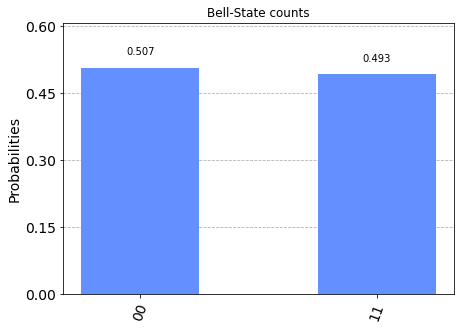

In [13]:

counts_qsm = res_qsm.get_counts(bell)
print (counts_qsm)
plot_histogram( counts_qsm, title='Bell-State counts')

***
***

## Extended Circuits
- initial state = $\vert 00 \rangle $ 
- After application of 1st Hadamard Gate: $ \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 10 \rangle $ 
- After application of 1st CNOT Gate: $ \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 11 \rangle $ 
- After application of 2nd Hadamard Gate:  $ \frac{1}{2} \vert 00 \rangle + \frac{1}{2} \vert 01 \rangle + \frac{1}{2} \vert 10 \rangle - \frac{1}{2} \vert 11 \rangle $
- After application of 2nd CNOT Gate:  $ \frac{1}{2} \vert 00 \rangle + \frac{1}{2} \vert 01 \rangle - \frac{1}{2} \vert 10 \rangle + \frac{1}{2} \vert 11 \rangle $


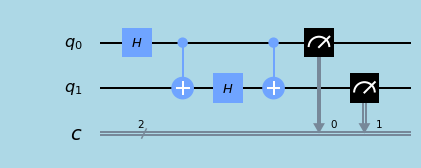

In [14]:
# Define quantum circuit

N_qubits=2; N_bits=2;
ckt2= QuantumCircuit(N_qubits, N_bits);

ckt2.h(0)
ckt2.cx(0, 1)
ckt2.h(1)  # this time on quibit 1
ckt2.cx(0, 1)
ckt2.measure([0,1],[0,1])
#ckt2.draw()
ckt2.draw(output='mpl', style = {'backgroundcolor':'lightblue'})

{'11': 474, '01': 491, '00': 546, '10': 489}


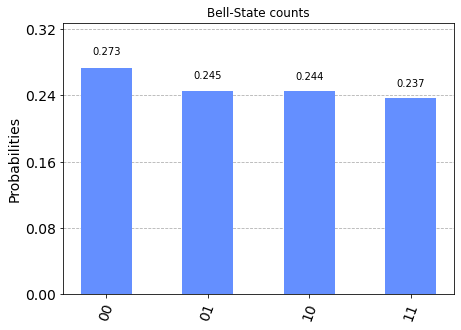

In [15]:
sim_qsm = Aer.get_backend('qasm_simulator')
job_qsm = execute(ckt2, sim_qsm, shots=2000)
res_qsm = job_qsm.result()
counts_qsm = res_qsm.get_counts(ckt2)
print (counts_qsm)
plot_histogram( counts_qsm, title='Bell-State counts')

# Circuit 2

In [16]:
# Define quantum circuit
import pylab as plt

%matplotlib inline

def ckt_(N, init_state, axis):
    q=QuantumRegister(N)
    c=ClassicalRegister(N)
    ckt3= QuantumCircuit(q, c);
    #print (q, c, q[0], c[0], q[1], q[2])

    ckt3.h(q[init_state])
    ckt3.cx(q[0], q[1])
    ckt3.h(q[1])  # this time on quibit 1
    ckt3.cx(q[1], q[2])
    ckt3.h(q[2])
    ckt3.cx(q[0], q[2])
    ckt3.measure(q, c)
    ckt3.draw(output='mpl', ax=axis)
    

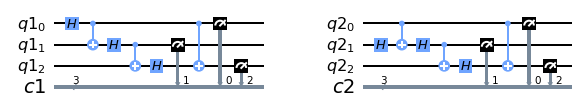

In [17]:
fig, ax = plt.subplots(1, 2) #figsize=(7, 7)
ckt_(3, 0, axis=ax[0])
ckt_(3, 1, axis=ax[1])

- Initial state: |000>
- After Hadamard Gate : $\frac{1}{\sqrt{2}}|000> + \frac{1}{\sqrt{2}}|100> $
- After CNOT Gate : $\frac{1}{\sqrt{2}}|000> + \frac{1}{\sqrt{2}}|110> $
- After Hadamard Gate : $\frac{1}{{2}}|000> + \frac{1}{{2}}|010>  +  \frac{1}{{2}}|100> - \frac{1}{{2}}|110>$
- After CNOT Gate :$\frac{1}{{2}}|000> + \frac{1}{{2}}|011>  +  \frac{1}{{2}}|100> - \frac{1}{{2}}|111>$
- After Hadamard Gate :$\frac{1}{2\sqrt{2}}|000> + \frac{1}{2\sqrt{2}}|001> + \frac{1}{2\sqrt{2}}|010>  - \frac{1}{2\sqrt{2}}|011> +  \frac{1}{2\sqrt{2}}|100> + \frac{1}{2\sqrt{2}}|101>  - \frac{1}{2\sqrt{2}}|110> + \frac{1}{2\sqrt{2}}|111>$


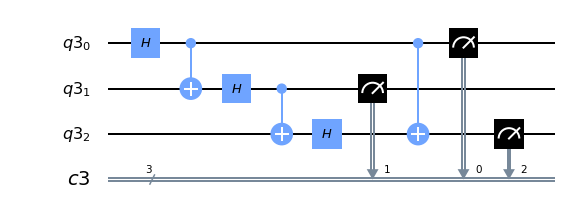

In [18]:
N=3;
q=QuantumRegister(N)
c=ClassicalRegister(N)
ckt3= QuantumCircuit(q, c, name='ckt3');

ckt3.h(q[0])
ckt3.cx(q[0], q[1])
ckt3.h(q[1])
ckt3.cx(q[1], q[2])
ckt3.h(q[2])
ckt3.cx(q[0], q[2])
ckt3.measure(q, c)
ckt3.draw(output='mpl')


In [19]:
sim_uni = Aer.get_backend('unitary_simulator')
job_uni = execute(ckt3, sim_uni)
res_uni = job_uni.result()
print (res_uni)

#print (res_uni.get_unitary(ckt3,decimals=1))

Result(backend_name='unitary_simulator', backend_version='0.5.1', date=datetime.datetime(2020, 8, 18, 22, 26, 9, 279101), header=Obj(backend_name='unitary_simulator', backend_version='0.5.1'), job_id='ef141414-2a51-4019-b6da-4dddc3af8e4f', metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0027959860000000003}, qobj_id='5ea95d5b-14c0-49d4-a754-ad6592078974', results=[ExperimentResult(data=ExperimentResultData(), meas_level=<MeasLevel.CLASSIFIED: 2>, seed_simulator=123145491233880, shots=123145491234096, status='ERROR: Circuit contains invalid instructions ( invalid non gate or snapshot instructions in opset {optypes={gate,measure}, gates={h,cx}, snapshots={}} for unitary method)', success=False, time_taken=6.08419566586634e-310)], status='PARTIAL COMPLETED', success=False, time_taken=0.003159046173095703)


{'110': 276, '100': 251, '101': 238, '000': 236, '111': 260, '011': 243, '001': 265, '010': 231} 2000


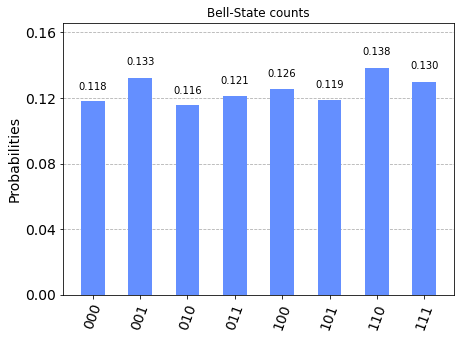

In [20]:
sim_qsm = Aer.get_backend('qasm_simulator')
job_qsm = execute(ckt3, sim_qsm, shots=2000)
res_qsm = job_qsm.result()
counts_qsm = res_qsm.get_counts(ckt3)
print (counts_qsm, sum(counts_qsm.values()))
plot_histogram( counts_qsm, title='Bell-State counts')
#ckt3.to_matrix()

## System with N Qubits

8
Time taken: 0.00689697265625 sec


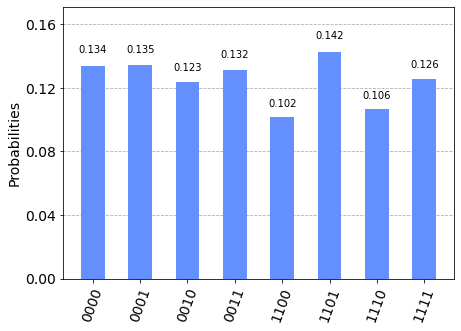

In [21]:
N=4;
q=QuantumRegister(N)
c=ClassicalRegister(N)
circ = QuantumCircuit(q, c);

for i in range(0, N-1):
    circ.h(q[i])
    circ.cx(q[i], q[i+1])

circ.measure(q, c)
sim_qsm = Aer.get_backend('qasm_simulator')
job_qsm = execute(circ, sim_qsm, shots=2000)
res_qsm = job_qsm.result()
counts_qsm = res_qsm.get_counts(circ)
print (len(counts_qsm.values()))
print("Time taken: {} sec".format(res_qsm.time_taken))
%matplotlib inline
plot_histogram( counts_qsm)